# Vector Data 

This notebook is a modified version of M. Janosov's original, as presented in *[Geospatial Data Science Essentials](https://www.janosov.com/books/geo/)*


Geospatial data can be broadly categorized into two types: raster and vector data. 

- Raster data represents the world as a grid of equally sized cells, with each cell (or pixel) holding a value representing information such as temperature, elevation, or land cover type.
  - Raster data is typically used for continuous data, such as satellite imagery or digital elevation models (DEMs).
- Vector data represents the world using points, lines, and polygons, as we saw with Shapely earlier. Points can represent single locations like bars or cities, lines can represent roads or rivers, and polygons can represent areas such as countries or lakes.
  - Vector data is well-suited for discrete data, where the precise location and shape of geographic features are important.

In this notebook, we will focus on vector data and learn to use the Python library [GeoPandas](https://geopandas.org/en/stable/). GeoPandas is an extension of the popular data manipulation library Pandas, combined with Shapely's geometry processing capabilities. It allows us to leverage the rich tools for manipulating and analyzing tabular data with Pandas, along with the versatile geometry operations of Shapely, to provide a robust toolkit for spatial analysis.

### 1. Querying the Built-in Datasets in GeoPandas

GeoPandas no longer comes with a collection of built-in datasets that we can use for learning and experimentation. We need to use the `geodatasets` library.

While the exact selection of datasets may vary across versions, in general, these datasets are useful for practicing spatial analysis techniques and understanding how to work with GeoPandas' functionalities. We can easily access and query these datasets to explore their content.

**Note:** while in the GeoPandas version (0.14.1) originally used by Janosov there are built-in data sets - in the latest release (1.0), they have been removed and must be loaded from the separate package [geodatasets](https://geodatasets.readthedocs.io/en/stable/). 

We have already seen how to query the available built-in datasets in GeoPandas/GeoDataSets.

In [1]:
# Import the GeoPandas and GeoDataSets libraries
import geopandas as gpd
import geodatasets

# Query the available built-in datasets in GeoPandas
available_datasets = geodatasets.data.flatten().keys()

# Print the list of available datasets
print("Available built-in datasets in GeoPandas/GeoDataSets:", "\n")
print(available_datasets, "\n")

Available built-in datasets in GeoPandas/GeoDataSets: 

dict_keys(['geoda.airbnb', 'geoda.atlanta', 'geoda.cars', 'geoda.charleston1', 'geoda.charleston2', 'geoda.chicago_health', 'geoda.chicago_commpop', 'geoda.chile_labor', 'geoda.cincinnati', 'geoda.cleveland', 'geoda.grid100', 'geoda.groceries', 'geoda.guerry', 'geoda.health', 'geoda.health_indicators', 'geoda.hickory1', 'geoda.hickory2', 'geoda.home_sales', 'geoda.houston', 'geoda.juvenile', 'geoda.lansing1', 'geoda.lansing2', 'geoda.lasrosas', 'geoda.liquor_stores', 'geoda.malaria', 'geoda.milwaukee1', 'geoda.milwaukee2', 'geoda.ncovr', 'geoda.natregimes', 'geoda.ndvi', 'geoda.nepal', 'geoda.nyc', 'geoda.nyc_earnings', 'geoda.nyc_education', 'geoda.nyc_neighborhoods', 'geoda.orlando1', 'geoda.orlando2', 'geoda.oz9799', 'geoda.phoenix_acs', 'geoda.police', 'geoda.sacramento1', 'geoda.sacramento2', 'geoda.savannah1', 'geoda.savannah2', 'geoda.seattle1', 'geoda.seattle2', 'geoda.sids', 'geoda.sids2', 'geoda.south', 'geoda.spirals', 

The previous cell shows how to list the built-in datasets of our GeoPandas version. These datasets are included to help users get started with geospatial analysis without needing to find and load external data. The versions of the built-in datasets that we will need are:

`naturalearth_cities`: This dataset contains point geometries representing major cities around the world. It is sourced from [Natural Earth](https://www.naturalearthdata.com), a public domain map dataset.

`naturalearth_lowres`: This dataset contains polygon geometries representing country boundaries at a relatively low spatial resolution. It is sourced from Natural Earth as well, but has been modified to include cultural data.


### 2. Parsing a Data File into a GeoDataFrame

GeoPandas makes it easy to read various geospatial data formats and convert them into `GeoDataFrames`, which are the core data structures we will be using for spatial analysis throughout this course. We can easily parse data files, such as [shapefiles](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://geojson.org), and other formats, into GeoDataFrames to perform various geospatial operations.

In this example, we will parse the built-in dataset `naturalearth_lowres` from GeoPandas into a GeoDataFrame and display it as a code cell output first by obtaining the location of the file using the `datasets.get_path` function and then use this path as an input for the `read_file` function of GeoPandas. Once parsed, we display the content of the GeoDataFrame.

In [3]:
# Define location of the data file
file_name = 'naturalearth_lowres/naturalearth_lowres.shp'

import warnings
warnings.filterwarnings('ignore')

# Read the saved dataset (naturalearth_lowres) into a GeoDataFrame
gdf = gpd.read_file(file_name)

# Display the first 3 rows of the GeoDataFrame
gdf.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [30]:
# Display the last 3 rows of the GeoDataFrame
gdf.tail(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,11062113.0,Africa,S. Sudan,SSD,11998,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


As the previous cell outputs show, this table has a component that is easily convertible into a regular Pandas DataFrame. This part includes the 

- name (`name`) and code (`iso_a3`) of the countries,
- continent (`continent`) they are located in,
- estimated population (`pop_est`) and
- GDP levels (`gdp_md_est`) of each country.

However, we see another column there - `geometry`. This geometry column makes the DataFrame a GeoDataFrame, as it contains the location of each data record in a geometric data structure defined by Shapely, using the Polygon and MultiPolygon classes.

### 3. Accessing the Geometry Column as a GeoSeries

In GeoPandas, each GeoDataFrame contains a special column for geometric data. This column stores the geometries and can be accessed as a `GeoSeries`. A GeoSeries is a special type of Pandas Series designed to handle geometric objects, enabling spatial operations and analysis. Here, we take a closer look at that particular column by directly accessing and printing its values of the built-in global map.

In [4]:
# Access the geometry column of the GeoDataFrame
geometry = gdf.geometry
geometry

0      MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...
1      POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...
2      POLYGON ((-8.66559 27.65643, -8.66512 27.58948...
3      MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...
4      MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...
                             ...                        
172    POLYGON ((18.82982 45.90887, 18.82984 45.90888...
173    POLYGON ((20.0707 42.58863, 19.80161 42.50009,...
174    POLYGON ((20.59025 41.85541, 20.52295 42.21787...
175    POLYGON ((-61.68 10.76, -61.105 10.89, -60.895...
176    POLYGON ((30.83385 3.50917, 29.9535 4.1737, 29...
Name: geometry, Length: 177, dtype: geometry

In [5]:
# Print the type of the geometry column to confirm it is a GeoSeries
print(f"Type of the geometry column: {type(geometry)}", "\n")

# Print the number of elements in the geometry column
print(f"Number of entries in the geometry column: {len(geometry)}", "\n")

Type of the geometry column: <class 'geopandas.geoseries.GeoSeries'> 

Number of entries in the geometry column: 177 



### 4. Creating a GeoDataFrame from Scratch

GeoPandas also allows us to create GeoDataFrames from scratch, which can be particularly useful when we have custom data or want to construct a geospatial dataset manually. A GeoDataFrame is similar to a Pandas DataFrame, but as we saw earlier, it includes a column for geometric data, enabling spatial operations and analyses.

In this example, we'll create a `GeoDataFrame` from a list of dictionaries containing city names and their locations as Point geometries built from the cities' corresponding geographic coordinates using Shapely.

In [7]:
# Import the necessary libraries
from shapely.geometry import Point

# Define a list of dictionaries with city 
# names and their geographic locations
cities_points = [
    {'name': 'Budapest',    'geometry': Point(19.0402,  47.4979)},
    {'name': 'Vienna',      'geometry': Point(16.3738,  48.2082)},
    {'name': 'Barcelona',   'geometry': Point(2.1734,   41.3851)},
    {'name': 'New York',    'geometry': Point(-74.0060, 40.7128)},
    {'name': 'Los Angeles', 'geometry': Point(-118.243, 34.0522)},
    {'name': 'Helsinki',    'geometry': Point(24.9354,  60.1695)},
    {'name': 'Dublin',      'geometry': Point(-6.2603,  53.3498)},
    {'name': 'London',      'geometry': Point(-0.1278,  51.5074)},
    {'name': 'Amsterdam',   'geometry': Point(4.9041,   52.3676)}
]

# Create a GeoDataFrame from the list of dictionaries
gdf_cities = gpd.GeoDataFrame(cities_points)

# Show the GeoDataFrame
gdf_cities

,name,geometry
0,Budapest,POINT (19.0402 47.4979)
1,Vienna,POINT (16.3738 48.2082)
2,Barcelona,POINT (2.1734 41.3851)
3,New York,POINT (-74.006 40.7128)
4,Los Angeles,POINT (-118.243 34.0522)
5,Helsinki,POINT (24.9354 60.1695)
6,Dublin,POINT (-6.2603 53.3498)
7,London,POINT (-0.1278 51.5074)
8,Amsterdam,POINT (4.9041 52.3676)


This cell output shows the example GeoDataFrame we just created, containing the point-level location and name of these selected cities.

### 5.  Creating a GeoDataFrame from a DataFrame

After creating a GeoDataFrame from scratch, we can convert from Pandas to GeoPandas. It is important to know that GeoPandas allows us to easily convert a Pandas `DataFrame` containing geographic coordinates into a GeoDataFrame. This process involves creating geometric objects (such as points) from coordinate columns using Shapely and then constructing a `GeoDataFrame` that includes these geometries. This is useful for transforming traditional tabular data into a geospatial format for spatial analysis.

In [8]:
# Import the necessary libraries
import pandas as pd

# Define a list of dictionaries with city 
# names and their geographic locations
df_cities = pd.DataFrame([
    {'name': 'Budapest',    'longitude': 19.0402,   'latitude': 47.4979},
    {'name': 'Vienna',      'longitude': 16.3738,   'latitude': 48.2082},
    {'name': 'Barcelona',   'longitude': 2.1734,    'latitude': 41.3851},
    {'name': 'New York',    'longitude': -74.006,   'latitude': 40.7128},
    {'name': 'Los Angeles', 'longitude': -118.2437, 'latitude': 34.0522},
    {'name': 'Helsinki',    'longitude': 24.9354,   'latitude': 60.1695},
    {'name': 'Dublin',      'longitude': -6.2603,   'latitude': 53.3498},
    {'name': 'London',      'longitude': -0.1278,   'latitude': 51.5074},
    {'name': 'Amsterdam',   'longitude': 4.9041,    'latitude': 52.3676}
])

# Display the first 5 rows of the DataFrame
print("Pandas DataFrame:", "\n")
display(df_cities.head(5))

Pandas DataFrame: 



,name,longitude,latitude
0,Budapest,19.0402,47.4979
1,Vienna,16.3738,48.2082
2,Barcelona,2.1734,41.3851
3,New York,-74.0060,40.7128
4,Los Angeles,-118.2437,34.0522


In [9]:
# Create a list of Shapely Point objects from the long and lat columns
geometry = [Point(xy) for xy in \
            zip(df_cities['longitude'], df_cities['latitude'])]

# Print the first five geometries we created
geometry[0:5]

[<POINT (19.04 47.498)>,
 <POINT (16.374 48.208)>,
 <POINT (2.173 41.385)>,
 <POINT (-74.006 40.713)>,
 <POINT (-118.244 34.052)>]

In [10]:
# Create a GeoDataFrame from the DataFrame, including the geometry column
gdf_cities = gpd.GeoDataFrame(df_cities, geometry=geometry)

# Optionally, drop the original longitude and latitude columns
gdf_cities = gdf_cities.drop(columns=['longitude', 'latitude'])

# Display the first 5 rows of the GeoDataFrame
print("\nGeoPandas GeoDataFrame:", "\n")
gdf_cities.head(5)


GeoPandas GeoDataFrame: 



,name,geometry
0,Budapest,POINT (19.0402 47.4979)
1,Vienna,POINT (16.3738 48.2082)
2,Barcelona,POINT (2.1734 41.3851)
3,New York,POINT (-74.006 40.7128)
4,Los Angeles,POINT (-118.2437 34.0522)


### 6. Writing a GeoDataFrame to a File

GeoPandas allows us to easily export GeoDataFrames to various GIS file formats, making it simple to share, store, and visualize our geospatial data. The most common formats include 
- [Shapefile](https://en.wikipedia.org/wiki/Shapefile) and
- [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON),

among others. Exporting GeoDataFrames to these formats ensures compatibility with many GIS tools and applications.

In the following example, we will recreate the global cities' GeoDataFrame using the previously defined `cities_points` dictionary and export it into these two different geospatial file types using the `to_file` method.

In [11]:
# Create the GeoDataFrame
gdf_cities = gpd.GeoDataFrame(cities_points)

# Write the GeoDataFrame to a Shapefile
gdf_cities.to_file('Cities.shp')

# Write the GeoDataFrame to a GeoJSON file
gdf_cities.to_file('Cities.geojson', driver='GeoJSON')

# Confirmation messages
print("GeoDataFrame has been written to 'Cities.shp'.", "\n")
print("GeoDataFrame has been written to 'Cities.geojson'.", "\n")

GeoDataFrame has been written to 'Cities.shp'. 

GeoDataFrame has been written to 'Cities.geojson'. 



### 7.  Bounds of a GeoSeries

The `bounds` of a GeoSeries, storing the geometric information of a GeoDataFrame, provide the minimum bounding box that completely contains each geometry in the series. This bounding box is defined by the minimum and maximum x and y coordinates (minx, miny, maxx, maxy) for each geometry. 

Knowing the bounds of geometries can be useful for various spatial analyses, such as determining the extent of spatial features and performing spatial indexing. We now obtain these bounds using the sample global map data.

In [12]:
# Display the first five countries in the GeoDataFrame
display(gdf.head(5))

# Access the bounds of the geometry column
bounds = gdf.geometry.bounds

# Display the bounds of the first five geometries
print("Bounds of the geometries in the GeoDataFrame:", "\n")
bounds.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


Bounds of the geometries in the GeoDataFrame: 



,minx,miny,maxx,maxy
0,-180.000000,-18.287990,180.000000,-16.020882
1,29.339998,-11.720938,40.316590,-0.950000
2,-17.063423,20.999752,-8.665124,27.656426
3,-140.997780,41.675105,-52.648099,83.233240
4,-171.791111,18.916190,-66.964660,71.357764


### 8. Area and Perimeter Computation

As GeoPandas is building on Shapely, it has the ability to calculate the area and perimeter length of geometries stored in a GeoDataFrame. Area calculation is especially useful for polygons, which represent the surface area of geographic features. The length and the area are computed in the units of the coordinate reference system (CRS) used by the geometries. In [Notebook4](../notebook4), we will study CRS in more detail.

In the following examples, we will import the built-in global country map data file, store it in a GeoDataFrame, and then call its built-in length and area computation commands.

In [13]:
# Calculate the length of each geometry in the GeoDataFrame
length = gdf.length

# Print the areas of the geometries
print("Data type of the length:", type(length), "\n")

# Print the areas of the geometries
print("Length of the geometries as country perimeters:", "\n")
length

Data type of the length: <class 'pandas.core.series.Series'> 

Length of the geometries as country perimeters: 



0        8.991010
1       37.260671
2       27.662143
3      916.062855
4      356.977119
          ...    
172     16.326071
173      5.679511
174      4.938975
175      3.387105
176     37.450164
Length: 177, dtype: float64

In [14]:
# Calculate the area of each geometry in the GeoDataFrame
areas = gdf.area

# Print the areas of the geometries
print("Data type of the areas:", type(areas), "\n")

# Print the areas of the geometries
print("Areas of the geometries as country areas:", "\n")
areas

Data type of the areas: <class 'pandas.core.series.Series'> 

Areas of the geometries as country areas: 



0         1.639511
1        76.301964
2         8.603984
3      1712.995228
4      1122.281921
          ...     
172       8.604719
173       1.479321
174       1.231641
175       0.639000
176      51.196106
Length: 177, dtype: float64

By calculating the area of geometries in a GeoDataFrame, we can perform various spatial analyses that require surface area measurements, such as land use analysis, habitat estimation, and resource management.

### 9. Simple Visualization with GeoPandas

GeoPandas makes it easy to visualize geospatial data by providing built-in plotting capabilities. Using the `plot` method, we can quickly create simple maps to visualize the geometries in a GeoDataFrame. This functionality is helpful for creating quick visual representations of spatial data.

In this example, first, we recap how to read the global country map data and then quickly visualize the GeoDataFrame.

*Note*: While we are already using the visualization library `Matplotlib` behind the scenes, we will dive deeper into geospatial data visualization in the upcoming notebooks.

<Axes: >

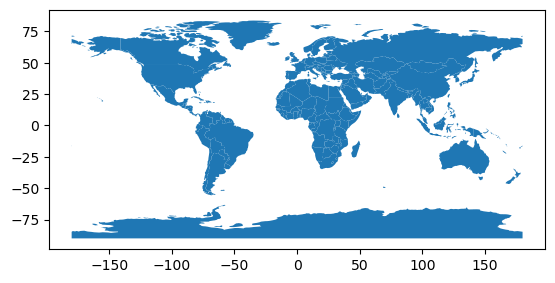

In [15]:
# Import the necessary library
import geopandas as gpd

# Define location of the data file
file_name = 'naturalearth_lowres/naturalearth_lowres.shp'

# Read the saved dataset (naturalearth_lowres) into a GeoDataFrame
gdf = gpd.read_file(file_name)

# Plot the GeoDataFrame
gdf.plot()

By using GeoPandas' built-in plotting capabilities, we can quickly create visualizations of our geospatial data. In the later dedicated notebook, we will further explore how these maps can be customized for advanced spatial analytics.

### 10.  Buffering a GeoDataFrame

Buffering is a common spatial operation implemented in Shapely and, consequently, inherited by GeoPandas. Geometry buffering involves creating zones around geometric features. In GeoPandas, we can easily buffer geometries in a GeoDataFrame using the `buffer` method, which is useful for various spatial analyses such as 
- proximity analysis,
- impact assessments, and
- creating buffer zones around specific spatial features.

In the following code block, we first create a sample GeoDataFrame consisting of the locations of a few selected global cities using the previously defined `cities_points` dictionary. Then, we create a copy of the GeoDataFrame, which we will modify by applying a buffer zone with a radius of 5 units. As a comparison, we visualize both the unbuffered and buffered GeoDataFrames.

Buffered GeoDataFrame: 



,name,geometry
0,Budapest,"POLYGON ((24.0402 47.4979, 24.01612 47.00781, ..."
1,Vienna,"POLYGON ((21.3738 48.2082, 21.34972 47.71811, ..."
2,Barcelona,"POLYGON ((7.1734 41.3851, 7.14932 40.89501, 7...."
3,New York,"POLYGON ((-69.006 40.7128, -69.03008 40.22271,..."
4,Los Angeles,"POLYGON ((-113.243 34.0522, -113.26708 33.5621..."
5,Helsinki,"POLYGON ((29.9354 60.1695, 29.91132 59.67941, ..."
6,Dublin,"POLYGON ((-1.2603 53.3498, -1.28438 52.85971, ..."
7,London,"POLYGON ((4.8722 51.5074, 4.84812 51.01731, 4...."
8,Amsterdam,"POLYGON ((9.9041 52.3676, 9.88002 51.87751, 9...."


<Axes: >

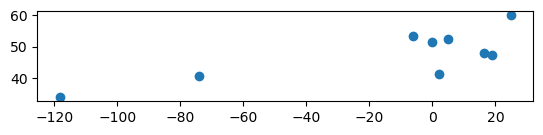

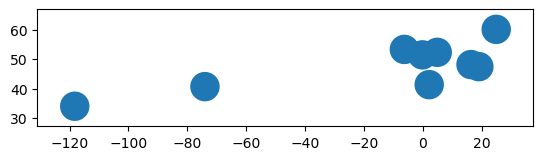

In [17]:
# Plot the original GeoDataFrame
gdf_cities.plot()

# Create a copy of the GeoDataFrame for buffering
gdf_cities_buffered = gdf_cities.copy()

# Apply a buffer of 5 units around each geometry
gdf_cities_buffered['geometry'] = gdf_cities_buffered['geometry'].buffer(5)

# Display the buffered GeoDataFrame
print("Buffered GeoDataFrame:", "\n")
display(gdf_cities_buffered)

# Plot the buffered GeoDataFrame
gdf_cities_buffered.plot()

### 11. Spatial Join with GeoPandas

**Spatial join** is a powerful operation that combines two GeoDataFrames based on their spatial relationship. This operation is useful for integrating different spatial datasets and performing complex spatial analyses. GeoPandas provides the `sjoin` method to perform spatial joins, allowing us to merge GeoDataFrames based on spatial relations like intersection, within, and contains.

In the next example, we will illustrate spatial join by combining two of the data sets we have been previously using in this section. 

1. First, we read the global country-level data again, containing the polygon boundaries of each country.
2. Second, we re-create the global city selection table containing the point locations of each city using the `cities_points` dictionary.

In [20]:
# Load a sample GeoDataFrame (using the built-in 
# 'naturalearth_lowres' dataset for countries)
#  Define location of the data file
file_name = 'naturalearth_lowres/naturalearth_lowres.shp'

# Read the saved dataset (naturalearth_lowres) into a GeoDataFrame
gdf_countries = gpd.read_file(file_name)

# Create the GeoDataFrame for cities
gdf_cities = gpd.GeoDataFrame(cities_points)

Then, we apply several data preparation steps, such as selecting and renaming the target columns within these DataFrames.

In [21]:
# Filter and prepare the countries GeoDataFrame
gdf_countries_filtered = gdf_countries[['name', 'geometry']].rename( \
                    columns={'name': 'country'}).set_index('country')


# Filter and prepare the cities GeoDataFrame
gdf_cities_filtered = gdf_cities[['name', 'geometry']].rename( \
                    columns={'name': 'city'}).set_index('city')

# Display the first 3 rows of the filtered countries GeoDataFrame
print("Filtered countries GeoDataFrame:", "\n")
display(gdf_countries_filtered.head(3))

# Display the first 3 rows of the filtered cities GeoDataFrame
print("Filtered cities GeoDataFrame:", "\n")
display(gdf_cities_filtered.head(3))

# Print the number of entries in the filtered GeoDataFrames
print(f"Number of countries: {len(gdf_countries_filtered)}", "\n")
print(f"Number of cities: {len(gdf_cities_filtered)}", "\n")

Filtered countries GeoDataFrame: 



,geometry
country,
Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


Filtered cities GeoDataFrame: 



,geometry
city,
Budapest,POINT (19.0402 47.4979)
Vienna,POINT (16.3738 48.2082)
Barcelona,POINT (2.1734 41.3851)


Number of countries: 177 

Number of cities: 9 



Now, we perform the spatial joins. First, we join the cities to the countries, and then, we join the countries to the cities. The order will define the type of output we get from the spatial joins.

Number of cities matched to countries: 9 

Cities within countries: 



,geometry,country
city,,
Budapest,POINT (19.0402 47.4979),Hungary
Vienna,POINT (16.3738 48.2082),Austria
Barcelona,POINT (2.1734 41.3851),Spain
New York,POINT (-74.006 40.7128),United States of America
Los Angeles,POINT (-118.243 34.0522),United States of America
Helsinki,POINT (24.9354 60.1695),Finland
Dublin,POINT (-6.2603 53.3498),Ireland
London,POINT (-0.1278 51.5074),United Kingdom
Amsterdam,POINT (4.9041 52.3676),Netherlands


<Axes: >

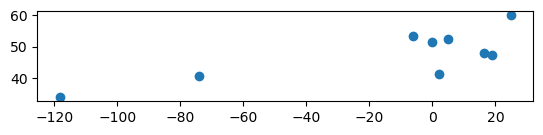

In [24]:
# Perform a spatial join: cities within countries
cities_within_countries = gpd.sjoin(gdf_cities_filtered, 
                                    gdf_countries_filtered, 
                                    how="inner",
                                    predicate="within")

print("Number of cities matched to countries:", \
      len(set(cities_within_countries.index)), "\n")

print("Cities within countries:", "\n")
display(cities_within_countries)
cities_within_countries.plot()

Number of countries containing cities: 8 

Countries containing cities: 



,geometry,city
country,,
United States of America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",Los Angeles
United States of America,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",New York
Austria,"POLYGON ((16.97967 48.1235, 16.90375 47.71487,...",Vienna
Hungary,"POLYGON ((22.08561 48.42226, 22.64082 48.15024...",Budapest
Netherlands,"POLYGON ((6.90514 53.48216, 7.09205 53.14404, ...",Amsterdam
Spain,"POLYGON ((-7.45373 37.09779, -7.53711 37.4289,...",Barcelona
Ireland,"POLYGON ((-6.19788 53.86757, -6.03299 53.15316...",Dublin
United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",London
Finland,"POLYGON ((28.59193 69.06478, 28.44594 68.36461...",Helsinki


<Axes: >

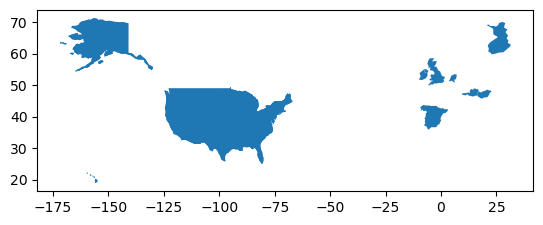

In [25]:
# Perform a spatial join: countries containing cities
countries_containing_cities = gpd.sjoin(gdf_countries_filtered, 
                                        gdf_cities_filtered, 
                                        how="inner", 
                                        predicate="contains")

print("Number of countries containing cities:", \
      len(set(countries_containing_cities.index)), "\n")

print("Countries containing cities:", "\n")
display(countries_containing_cities)
countries_containing_cities.plot()

On the one hand, these results show that the spatial join successfully matched all nine cities to their respective countries, so the number of cities matched to countries equals the number of cities in the original GeoDataFrame. Since all cities were matched to a country, the **cities_within_countries** map displays all the cities we initially had. 

On the other hand, we filtered down the global list of 177 countries to only eight countries by joining the nine cities, as both New York City and Los Angeles belong to the US. As a result, the **countries_containing_cities** map contains only eight countries.

### 12.  Overlaying GeoDataFrames

**Overlaying** GeoDataFrames involves combining two spatial datasets based on their spatial relationship to create a new GeoDataFrame. GeoPandas provides the `overlay` method to perform these operations, allowing us to integrate and analyze spatial data efficiently.

In the following example, we first prepare the input data, which includes both the built-in world map and our example selection of cities using the `cities_points` dictionary. Then, we buffer the GeoDataFrame containing the cities, as demonstrated in the **Buffering a GeoDataFrame** section. Finally, we call the `overlay` method and use it to create a GeoDataFrame containing the intersection geometries of the cities' buffer zones and the country polygons they intersect.

Overlay result (first 10 rows): 



,name,geometry
0,New York,"POLYGON ((-71.50506 45.0082, -73.34783 45.0073..."
1,New York,"POLYGON ((-77.73789 43.62906, -76.82003 43.628..."
2,Los Angeles,"POLYGON ((-114.815 32.52528, -114.72139 32.720..."
3,Helsinki,"POLYGON ((27.85528 56.75933, 27.77002 57.24426..."
4,Los Angeles,"POLYGON ((-115.99135 32.61239, -114.72139 32.7..."
5,Barcelona,"POLYGON ((6.52925 43.12889, 4.55696 43.39965, ..."
6,Dublin,"POLYGON ((-4.59235 48.68416, -4.3735 48.72088,..."
7,London,"POLYGON ((-2.22572 47.06436, -2.96328 47.57033..."
8,Amsterdam,"POLYGON ((6.65823 49.20196, 8.09928 49.01778, ..."
9,Barcelona,"POLYGON ((1.46692 36.60565, 3.1617 36.7839, 4...."


<Axes: >

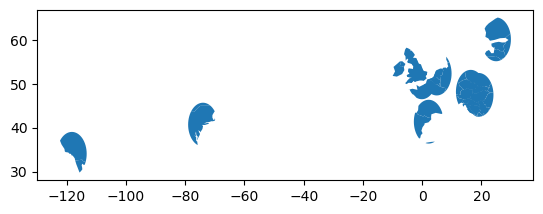

In [26]:
# Perform an overlay operation to find the intersection 
# of buffered cities with countries
gdf_over = gpd.overlay(gdf_countries_filtered, 
                       gdf_cities_buffered, 
                       how='intersection')

# Display the first 10 rows of the overlay result
print("Overlay result (first 10 rows):", "\n")
display(gdf_over.head(10))

# Plot the overlay result
gdf_over.plot()

By overlaying GeoDataFrames, we can create new GeoDataFrames by combining two DataFrames based on intersection areas, enabling more complex and insightful geospatial analyses. During overlay, we capture the intersecting parts of geometries, the previous code block results in polygons, which are the unions of circles (buffered city-location points) and countries, resulting in these strange, circularly cropped country fragments on the world map.

### 13.  Dissolving Polygons

**Dissolving** polygons is a spatial operation that combines multiple geometries within a GeoDataFrame based on a specified attribute. This process merges geometries that share the same value for the specified attribute, creating a single, unified geometry for each unique value. Dissolving is helpful for aggregating spatial data and simplifying the representation of geographic features. 

To demonstrate how dissolving a GeoDataFrame works, we will merge all countries within the `naturalearth_lowres` dataset that belong to the same continent. According to this `dissolve` operation, the final output of this cell will be a global map of continents, not countries, as the country boundaries will be dissolved along the shared attributes - joint continents. To better illustrate the effect of the operation, we set the edge color of each polygon to red in the `plot` method.

Dissolved GeoDataFrame: 



,geometry,pop_est,name,iso_a3,gdp_md_est
continent,,,,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",58005463.0,Tanzania,TZA,63177
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4490.0,Antarctica,ATA,898
Asia,"MULTIPOLYGON (((48.67923 14.0032, 48.23895 13....",18513930.0,Kazakhstan,KAZ,181665
Europe,"MULTIPOLYGON (((-53.55484 2.3349, -53.77852 2....",144373535.0,Russia,RUS,1699876
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",37589262.0,Canada,CAN,1736425
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",889953.0,Fiji,FJI,5496
Seven seas (open ocean),"POLYGON ((68.935 -48.625, 69.58 -48.94, 70.525...",140.0,Fr. S. Antarctic Lands,ATF,16
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.2321 ...",44938712.0,Argentina,ARG,445445


Number of records before the dissolve:  177 

Number of records after the dissolve:  8 



<Axes: >

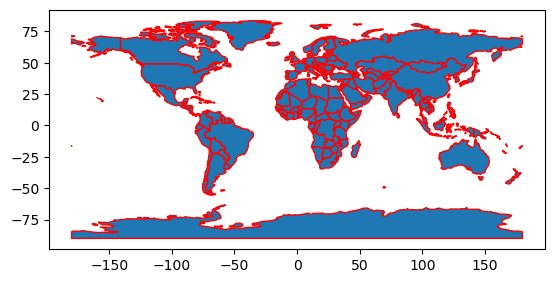

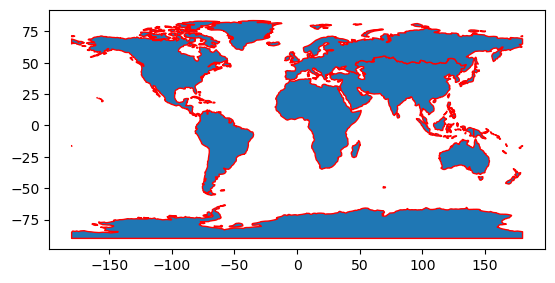

In [27]:
# Plot the country-level world map
gdf.plot(edgecolor = 'red')

# Dissolve polygons by the 'continent' attribute to 
# combine countries into continents
gdf_dissolved = gdf.dissolve(by='continent')

# Display the dissolved GeoDataFrame
print("Dissolved GeoDataFrame:", "\n")
display(gdf_dissolved)

# Print the size of the GeoDataFrame before and after the operation
print("Number of records before the dissolve: ", len(gdf), "\n")
print("Number of records after the dissolve: ", len(gdf_dissolved), "\n")

# Plot the dissolved GeoDataFrame to visualize the combined continents
gdf_dissolved.plot(edgecolor = 'red')

The output images show the country-level original and continent-level dissolved world maps, where every polygon's edge line is marked in red. This edge coloring highlights the countries in the first plot while only showing continent boundaries in the second.

### 14. Splitting Geometries in a GeoDataFrame


As we can merge geometries, for instance, by dissolving them based on mutual attributes, we can also **split** them. In particular, splitting geometries in a GeoDataFrame involves breaking multi-part geometries (such as MultiPolygons or MultiLineStrings) into their individual components. This process is useful for detailed analysis and manipulation of each component separately. GeoPandas provides the `explode` method to achieve this, which splits multi-part geometries into single geometries and creates a new row for each part. By splitting geometries in a GeoDataFrame, we can analyze and manipulate each component of multi-part geometries separately, enabling more detailed and granular spatial analyses.

To demonstrate this, we first read the country-level world map dataset. By displaying its first ten rows, we can already see that there are multiple MultiPolygons within them. Once we apply the explode command, we will see a significant increase in the number of records within the resulting GeoDataFrame, with each geometry stored as a Polygon. This illustrates that all the MultiPolygons were efficiently split into individual Polygons, each polygon inheriting all the other attributes of the initial data record. This transformation allows for more granular spatial analysis and manipulation. 

In [28]:
# Display the original GeoDataFrame
print("Original GeoDataFrame:", "\n")
display(gdf.head(10))


# Split multi-part geometries into their individual components 
# using the explode method
gdf_exploded = gdf.explode(index_parts=True)

# Display the exploded GeoDataFrame
print("Exploded GeoDataFrame:", "\n")
display(gdf_exploded.head(10))

# Print the size of the GeoDataFrame before and after the operation
print("Number of records before the explode: ", len(gdf), "\n")
print("Number of records after the explode: ", len(gdf_exploded), "\n")

Original GeoDataFrame: 



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5..."


Exploded GeoDataFrame: 



pop_est      continent       name iso_a3  gdp_md_est  \
0 0    889953.0        Oceania       Fiji    FJI        5496   
  1    889953.0        Oceania       Fiji    FJI        5496   
  2    889953.0        Oceania       Fiji    FJI        5496   
1 0  58005463.0         Africa   Tanzania    TZA       63177   
2 0    603253.0         Africa  W. Sahara    ESH         907   
3 0  37589262.0  North America     Canada    CAN     1736425   
  1  37589262.0  North America     Canada    CAN     1736425   
  2  37589262.0  North America     Canada    CAN     1736425   
  3  37589262.0  North America     Canada    CAN     1736425   
  4  37589262.0  North America     Canada    CAN     1736425   

                                              geometry  
0 0  POLYGON ((180 -16.06713, 180 -16.55522, 179.36...  
  1  POLYGON ((178.12557 -17.50481, 178.3736 -17.33...  
  2  POLYGON ((-179.79332 -16.02088, -179.91737 -16...  
1 0  POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...  
2 0  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3 0  POLYGON ((-122.84 49, -122.97421 49.00254, -12...  
  1  POLYGON ((-83.99367 62.4528, -83.25048 62.9140...  
  2  POLYGON ((-79.77583 72.8029, -80.8761 73.33318...  
  3  POLYGON ((-80.3154 62.08557, -79.92939 62.3856...  
  4  POLYGON ((-93.61276 74.98, -94.15691 74.59235,...

Number of records before the explode:  177 

Number of records after the explode:  287 



### 15.  Applying Simple Functions on GeoDataFrames

Applying functions to the geometries in a GeoDataFrame allows us to compute new attributes based on spatial properties. GeoPandas makes it easy to use Python's list comprehensions and the `apply` method to derive additional columns, such as geometric properties like length and area. 

In the following example, we will use these two methods to add new columns to our GeoDataFrame containing the global map. These new columns will contain the length and area, as well as the exact type of geometries.

In [29]:
# Display the existing GeoDataFrame
gdf_countries_filtered.head(3)

,geometry
country,
Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [30]:
# Calculate the length of each geometry and add it as a new column 
gdf_countries_filtered['geometry_length'] = \
            gdf_countries_filtered['geometry'].apply(\
                                                lambda x: x.length)

# Calculate the area of each geometry and add it as a new column
gdf_countries_filtered['geometry_area'] = \
            gdf_countries_filtered['geometry'].apply(\
                                                lambda x: x.area)

# Calculate the type of each geometry and add it as a new column 
gdf_countries_filtered['geometry_type'] = \
            gdf_countries_filtered['geometry'].apply(\
                                                lambda x: type(x).__name__)

# Display the new GeoDataFrame
gdf_countries_filtered.head(3)

,geometry,geometry_length,geometry_area,geometry_type
country,,,,
Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",8.991010,1.639511,MultiPolygon
Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",37.260671,76.301964,Polygon
W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",27.662143,8.603984,Polygon


### 16.  Generating Random Synthetic Data

Generating random synthetic data can be useful for testing, simulation, and demonstrating geospatial techniques. In this example, we will use the world map GeoDataFrame, determine its bounding box, and generate 1000 points uniformly randomly placed within that bounding box using [NumPy](https://numpy.org). Once the points are generated and stored in a GeoDataFrame, we will visualize the results.

<Axes: >

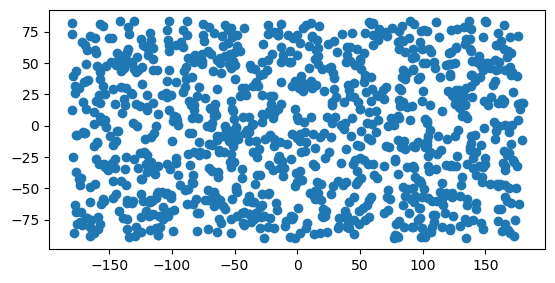

In [31]:
# Import the necessary libraries
import numpy as np

# Load a sample GeoDataFrame

# Calculate the minimum and maximum bounds of the GeoDataFrame
bounds = gdf.total_bounds
minx, miny, maxx, maxy = bounds

# Initialize an empty list to store random points
random_points = []

# Generate 1000 random points within the bounds
for _ in range(1000):
    x = np.random.uniform(minx, maxx)
    y = np.random.uniform(miny, maxy)
    random_points.append(Point(x, y))

# Create a GeoDataFrame from the list of random points
gdf_rand = gpd.GeoDataFrame(random_points, columns=['geometry'])

# Plot the GeoDataFrame with random points
gdf_rand.plot()

### 17. Counting Points in Polygons


Counting points within polygons is a common spatial analysis task that helps determine how many point features fall within each polygon feature. This is useful for various applications such as 
- population density analysis,
- event clustering, and
- resource allocation.

GeoPandas provides tools to perform spatial joins and group by operations to achieve this.

In this exercise, we will combine several techniques from previous sections. 
- First, we will create 10,000 random points spread across the global map (`gdf_rand`).
- Then, we will use a spatial join to match each point to one of the countries (`gdf_joined`) and count the number of points within each country (`gdf_counted`). This task is similar to the previous spatial join example but uses a data size significantly closer to real-life expectations.
- Finally, we will merge the prepared to join the point count value to the original DataFrame  (`gdf`) to prepare a data table appropriate for further spatial analysis.

In [43]:
# Import the necessary libraries
# Load a sample GeoDataFrame 
# Calculate the minimum and maximum bounds of the GeoDataFrame

# Initialize an empty list to store random points
random_points = []

# Generate 100000 random points within the bounds
for _ in range(10000):
    x = np.random.uniform(minx, maxx)
    y = np.random.uniform(miny, maxy)
    random_points.append(Point(x, y))

# Create a GeoDataFrame from the list of random points
gdf_rand = gpd.GeoDataFrame(random_points, columns=['geometry'])

# Filter and prepare the countries GeoDataFrame
gdf_countries_filtered = gdf_countries[['name', 'geometry']].rename(\
                         columns={'name': 'country'}).set_index('country')

# Perform a spatial join to find which points fall within which countries
gdf_joined = gpd.sjoin(gdf_rand, 
                       gdf_countries_filtered, 
                       how='left', 
                       predicate='within')


# Count the number of points in each polygon (country)
#gdf_counted = gdf_joined.groupby(by='index_right').count()[['geometry']]
#gdf_counted = gdf_counted.rename(\
#                       columns = {'geometry' : 'number_of_points'})

# Display the count of points within the first 10 polygons (countries)
#gdf_counted.sort_values(by = 'number_of_points', ascending = False).head(8)

In [44]:
# Merging the original GeoDataFrame with the counter DataFrame 
# using the country names as joint keys
#gdf_merged = gdf_countries.merge(gdf_counted, left_on = 'name', 
#                                 right_index = True)
#gdf_merged = gdf_merged[['name', 'number_of_points']]
#gdf_merged.head(10)

In this example, we combined several previously introduced steps to create new geospatial insights and merge them into an existing GeoDataFrame. By performing the counting points within polygons exercise, we can analyze spatial distributions and relationships, providing insights into patterns such as population density, event clustering, and resource allocation.

*Note*: The final results of this exercise may vary a bit due to the random generation involved.

### Summary on GeoPandas

In this notebook, we explored the comprehensive capabilities of GeoPandas, an extension of the Pandas library, designed specifically for geospatial vector data analysis. 

- We began by understanding the difference between raster and vector data, and highlighting GeoPandas' strength in handling vector data through points, lines, and polygons.
- Via the Shapely - GeoPandas integration, we got a robust toolkit for various spatial operations, such as buffering, splitting, and merging geometries.
- We demonstrated practical applications, including creating GeoDataFrames from scratch, converting Pandas DataFrames to GeoDataFrames, and exporting GeoDataFrames to common GIS file formats like Shapefile and GeoJSON.

Furthermore, we explored tools for advanced spatial analysis, such as spatial joins and overlays, to combine and analyze different geospatial datasets. 

The notebook also covered methods for 
- generating random synthetic data,
- performing point-in-polygon analyses, and
- visualizing geospatial data using GeoPandas' built-in plotting capabilities.

Through practical examples and detailed explanations, we illustrated how GeoPandas can be used to derive meaningful insights from geospatial data, making it an indispensable tool for anyone working in spatial analytics.

## Exercises

1. The `geopandas` [documentation](https://geopandas.org/en/stable/docs.html) has an excellent ["getting started"](https://geopandas.org/en/stable/getting_started/introduction.html) section. Read this section, as revision, and execute all the cells.
2. Take a moment to visit the Natural Earth [website](https://www.naturalearthdata.com/features/).
3. Download detailed adminstrative maps of the Philippines. Identify the major islands/provinces. 
4. Plot maps of the Philippines with various levels of adminstrative details. Plot some maps of each of the major islands/provinces.
5. Add some cities, for example Manila, to the `df_cities` dataframe in Section 4, and rerun the spatial join with the countries.